In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/HP/Desktop/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
#Finding and filling null age based on salutations in name

In [8]:
data['Salu']=0
for i in data:
    data['Salu']=data.Name.str.extract('([A-Za-z]+)\.')

In [9]:
data['Salu'].replace(['Master','Don','Rev','Dr','Mme','Ms','Major','Lady','Sir','Mlle','Col','Capt','Countess','Jonkheer'],
                     ['Mr','Mr','Other','Mr','Other','Miss','Mr','Mrs','Mr','Miss','Other','Mr','Mrs','Other'],inplace=True)

In [10]:
data['Salu'].unique()

array(['Mr', 'Mrs', 'Miss', 'Other'], dtype=object)

In [11]:
data.groupby('Salu')['Age'].mean()

Salu
Miss     21.845638
Mr       30.461056
Mrs      35.981818
Other    43.700000
Name: Age, dtype: float64

In [12]:
data.loc[(data.Age.isnull())&(data.Salu=='Miss'),'Age']=22

In [13]:
data.loc[(data.Age.isnull())&(data.Salu=='Mr'),'Age']=30

In [14]:
data.loc[(data.Age.isnull())&(data.Salu=='Mrs'),'Age']=36

In [15]:
data.loc[(data.Age.isnull())&(data.Salu=='Other'),'Age']=43

In [16]:
data.Age.isnull().any()

False

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Salu           0
dtype: int64

In [18]:
#Filling null values for Embarked column

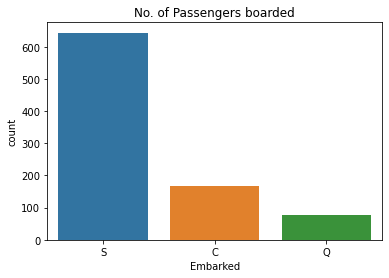

In [19]:
sns.countplot(x='Embarked',data=data)
plt.title('No. of Passengers boarded')
plt.show()

In [20]:
data.Embarked.fillna('S',inplace=True)

In [21]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Salu           False
dtype: bool

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salu
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


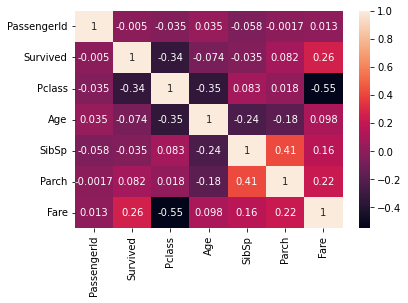

In [23]:
sns.heatmap(data.corr(),annot=True)
plt.show()

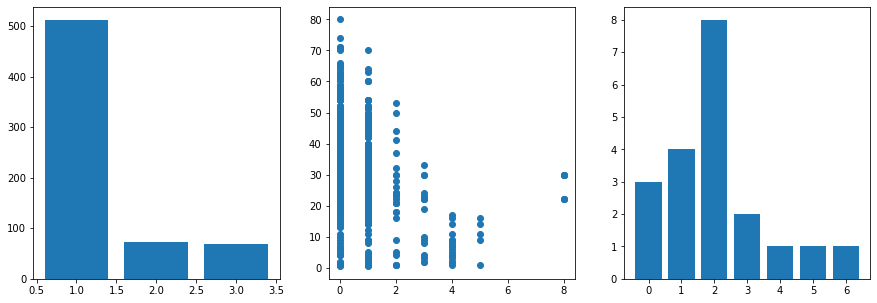

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.bar(data['Pclass'],data['Fare'])

plt.subplot(1,3,2)
plt.scatter(data['SibSp'],data['Age'])

plt.subplot(1,3,3)
plt.bar(data['Parch'],data['SibSp'])

plt.show()

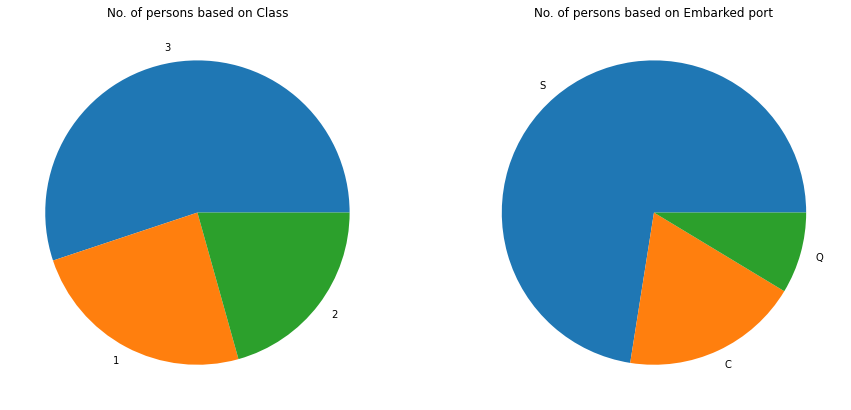

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie(data['Pclass'].value_counts(),startangle=0,labels=['3','1','2'])
plt.title('No. of persons based on Class')

plt.subplot(1,2,2)
plt.pie(data.Embarked.value_counts(),startangle=0,labels=['S','C','Q'])
plt.title('No. of persons based on Embarked port')
plt.show()

In [30]:
df=data[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


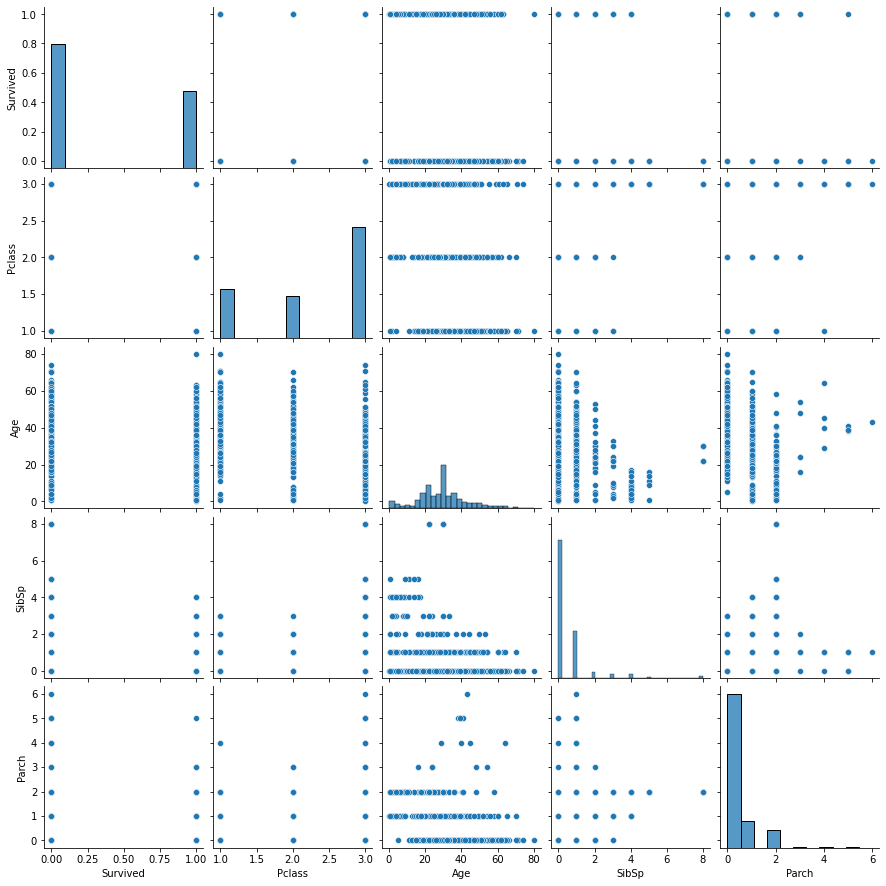

In [32]:
sns.pairplot(df)
plt.show()